In [1]:
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import hamming_loss,cohen_kappa_score, roc_auc_score,accuracy_score,f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score,auc
from scipy.stats import randint
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
import skfuzzy as fuzz
from kneed import KneeLocator
import openpyxl
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SVMSMOTE
from sklearn.tree import DecisionTreeClassifier
def roc_auc_score_multiclass(y_test, y_pred, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_test)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in y_test]
    new_pred_class = [0 if x in other_class else 1 for x in y_pred]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

# Datasets

In [543]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/yeast.xlsx')

In [555]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/pageblocks.xlsx')

In [569]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/wine.xlsx')

In [580]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/hayes-roth.xlsx')

In [591]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/balance.xlsx')

In [601]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/glass.xlsx')

In [614]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/shuttle.xlsx')

In [627]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/lymphography.xlsx')

In [639]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/heart-switzerland.xlsx')

In [169]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/J# Hybrid cluster-based oversampling and undersampling for multiclass imbalanced  classification/Datasets/heart-cleveland.xlsx')

In [665]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/flags.xlsx')

In [682]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/ecoli.xlsx')

In [695]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/dermatology.xlsx')

In [706]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/contraceptive.xlsx')

In [717]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/cardiotocography-10classes.xlsx')

In [13]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/J# Hybrid cluster-based oversampling and undersampling for multiclass imbalanced  classification/Datasets/cardiotocography-3classes.xlsx')

In [984]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/autos.xlsx')

In [1014]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/arrhythmia.xlsx')

In [999]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/penbased.xlsx')

In [783]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/thyroid.xlsx')

In [797]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/vehicle.xlsx')

In [807]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/lenses.xlsx')

In [820]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/steel-plates.xlsx')

In [830]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/wall-following.xlsx')

In [841]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/led7digit.xlsx')

In [853]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/flare.xlsx')

In [864]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/molec-biol-splice.xlsx')

In [877]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/new-thyroid.xlsx')

In [888]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/nursery.xlsx')

In [899]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/statlog-landsat.xlsx')

In [911]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/vertebral-column-3classes.xlsx')

In [938]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/winequality-red.xlsx')

In [953]:
df = pd.read_excel('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Datasets/zoo.xlsx')

In [110]:
df['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

In [21]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,One
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Three
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Two
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,One
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,Two
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,Three
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,Four
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,Two


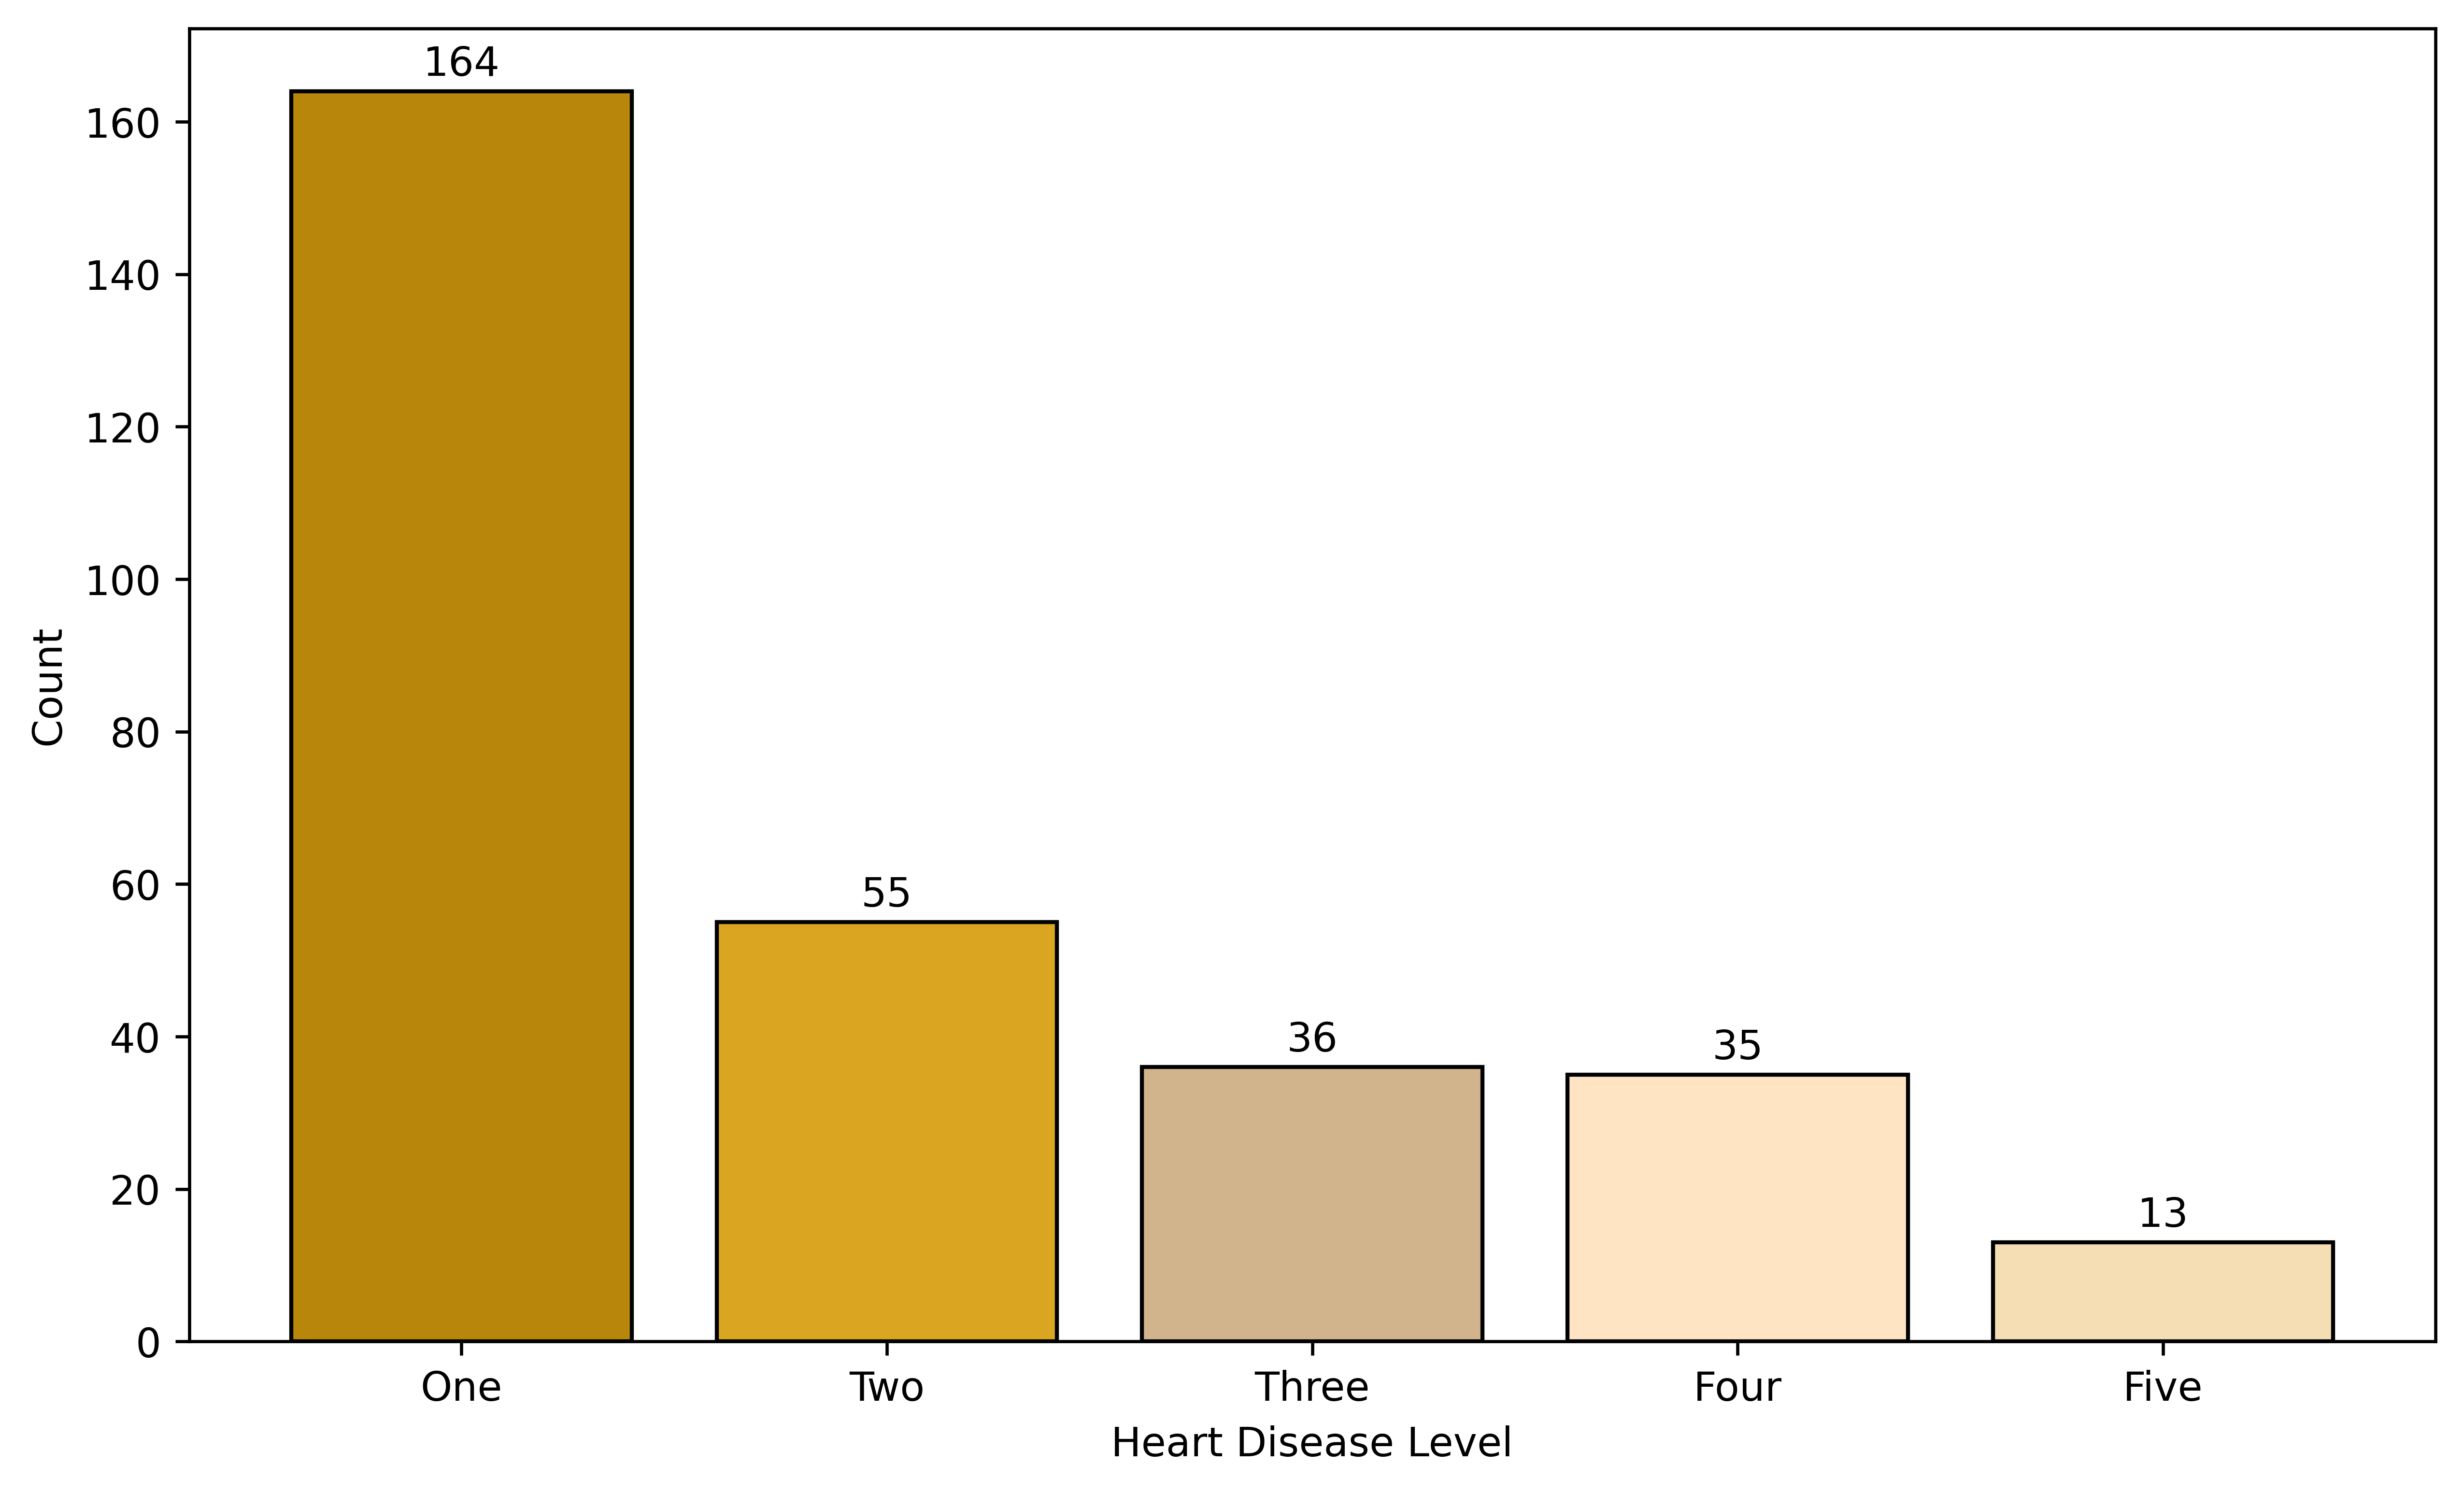

In [5]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'class' is the name of the target class column
class_counts = df['class'].value_counts()

# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=600)

# Creating the bar plot with different colors for each bar
colors = ['darkgoldenrod', 'goldenrod', 'tan','bisque','wheat']
plt.bar(class_counts.index, class_counts.values, color=colors,edgecolor="black")

# Adding labels and title
plt.xlabel('Heart Disease Level')
plt.ylabel('Count')


# Adding count above each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


# Data Augmentation

In [1023]:
df.columns = df.columns.astype(str)
X = df.drop('class',axis=1)
df_dummies = X.copy()
for i in df_dummies.columns : 
    if df_dummies[i].dtype == 'object' : 
        dummies = pd.get_dummies(df_dummies[i],prefix=i)
        dummies.columns = dummies.columns.str.replace(' ', '')
        df_dummies = pd.concat([df_dummies , dummies] , axis=1)
        df_dummies = df_dummies.drop(i , axis=1)
X = df_dummies
df = pd.concat([X,df['class']],axis=1)

newsample= 5
classname = 3
for j in range(newsample):    
    new_row = pd.DataFrame(dict(zip(df.columns, [0]*len(df.columns))), index=[len(df.index)])
    for i in range(len(df.columns)-1):
        new_row.iloc[:,i] = np.random.normal(loc=np.mean(df[df['class']==classname].iloc[:,i]), scale=np.std(df[df['class']==classname].iloc[:,i]), size=1)
        new_row['class'] = classname
    df = pd.concat([df,new_row])


# HyperParameter Setting

In [170]:
ClassNumber = df['class'].nunique()
testSize = 0.25
maxclusterMaj = 10
maxclusterMin =6
KSMOTE = 2
MinClusterObs = 3

In [171]:


df.loc[:,'class'][df['class']==0] = 'One'
df.loc[:,'class'][df['class']==1] = 'Two'
df.loc[:,'class'][df['class']==2] = 'Three'
df.loc[:,'class'][df['class']==3] = 'Four'
df.loc[:,'class'][df['class']==4] = 'Five'


# Majority Class Balancing

In [172]:

df_dummies = df.copy()
for i in df_dummies.columns : 
    if df_dummies[i].dtype == 'object' : 
        dummies = pd.get_dummies(df_dummies[i])
        dummies.columns = dummies.columns.str.replace(' ', '')
        df_dummies = pd.concat([df_dummies , dummies] , axis=1)
        df_dummies = df_dummies.drop(i , axis=1)
features = df_dummies.drop(df_dummies.columns[[list(range(df_dummies.shape[1]-ClassNumber,df_dummies.shape[1]))]],axis=1)
target = df_dummies.drop(features.columns,axis=1)  
Train_x,Test_x,Train_y,Test_y = train_test_split(features,target,test_size=testSize,random_state=1)
warnings.filterwarnings('ignore')


maj_list=[]
a =Train_y.sum()
b = a[a>=len(Train_y)/ClassNumber]
for i in b.index:
    locals()['{}'.format(i)] = Train_x[Train_x.index.isin((Train_y[(i)][Train_y[(i)]==1]).index)]
    locals()['y_{}'.format(i)] = Train_y[Train_y.index.isin((Train_y[(i)][Train_y[(i)]==1]).index)]
    maj_list.append(f'{i}')


strat_sample = {} 
n_clusters = 10
for j in maj_list:
  
    #NeighbourhoodCleaningRule
    #This class uses ENN and a k-NN to remove noisy samples from the datasets
    NHCR = globals()[j]
    NHCR['class'] = f'{j}'
    b = NHCR.iloc[1:int(len(Train_x)/ClassNumber)+1,:-1]
    b['class'] = 'Fake'
    NHCR = pd.concat([NHCR,b])
    X = NHCR.drop('class',axis = 1)
    y = NHCR.iloc[:,-1]
    y[y== f'{j}'] = 1
    y[y=='Fake'] = 0
    le = LabelEncoder()
    le.fit([0, 1]) 
    y = le.transform(y)
    cc = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)
    X_res, y_res = cc.fit_resample(X, y)
    X_res =pd.DataFrame(X_res).drop(pd.DataFrame(y_res)[y_res==0].index,axis=0)

    strat_sample[f'{j}'] = X_res
    strat_sample[f'{j}']['class'] = f'{j}'

    

    

In [173]:
maj_list

['One']

# Mid PreProcess Step

In [174]:
min_list=[]    
b = a[a<len(Train_y)/ClassNumber]
temp = pd.DataFrame()
for i in b.index:
    locals()['{}'.format(i)] = Train_x[Train_x.index.isin((Train_y[(i)][Train_y[(i)]==1]).index)]
    locals()['y_{}'.format(i)] = Train_y[Train_y.index.isin((Train_y[(i)][Train_y[(i)]==1]).index)] 
    min_list.append(f'{i}')
for i in min_list:
    globals()[i]['class'] = f'{i}'
    temp = pd.concat([temp,globals()[i]])
    
#from imblearn.over_sampling import SMOTE
#tempcopy = temp.copy()
#tempcopy['class'] = 'NotReal'
#temp = pd.concat([temp,tempcopy])
#sm = SMOTE(random_state=42,k_neighbors=3)
X = temp.drop('class',axis =1)
y = temp['class']

#X_res, y_res = sm.fit_resample(X, y)    
for i in min_list:
    locals()['{}'.format(i)] = X[X.index.isin(y[y==f'{i}'].index)]
    locals()['y_{}'.format(i)] = y[y.index.isin(y[y==f'{i}'].index)] 
strat_sample_min = {}     

In [175]:
min_list

['Five', 'Four', 'Three', 'Two']

# Minority Class Balancing

In [176]:
for j in min_list:
    print(j)
    silhouette_score_values_min=list()
    NumberOfClusters=range(2,maxclusterMin)

    for i in NumberOfClusters:

        classifier=KMeans(i,init='k-means++', n_init=10, max_iter=1000, tol=0.0001, verbose=0, random_state=1)
        classifier.fit(globals()[j])
        labels= classifier.predict(globals()[j])
        if (not any(not x for x in np.bincount(labels)>5)==False):
            silhouette_score_values_min.append(1000)
            continue
        silhouette_score_values_min.append(silhouette_score(globals()[j],labels ,metric='euclidean', sample_size=None, random_state=1))

    Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values_min.index(max(silhouette_score_values_min))]


    classifier=KMeans(Optimal_NumberOf_Components,init='k-means++', n_init=10, max_iter=1000, tol=0.0001, verbose=0, random_state=1,algorithm="full")
    classifier.fit(globals()[j])
    globals()[j]['cluster'] = classifier.labels_
    Optimal_NumberOf_Components = list(range(Optimal_NumberOf_Components))
    for i in np.unique(globals()[j]['cluster']):
        if np.bincount(globals()[j]['cluster'])[i] < MinClusterObs :

            large_clusters = [m for m in np.unique(globals()[j]['cluster']) if
                              np.bincount(globals()[j]['cluster'])[m] >= MinClusterObs]
            distances = []
            for cluster in large_clusters:
                # Find the centroid of the  cluster
                centroid = classifier.cluster_centers_[i]
                # Find the distance between the centroid of the large cluster and the centroids of the other clusters

                distances.append(sum(abs(centroid-classifier.cluster_centers_[cluster])))
            assign_to = large_clusters[distances.index(min(distances))]
            globals()[j]['cluster'][globals()[j]['cluster'] == i]= assign_to
            Optimal_NumberOf_Components.remove(i)



    w = globals()[j]['cluster'].value_counts()/len(globals()[j])
    print(w)

    strat_sample_min[f'{j}'] = pd.DataFrame()
    for i in (Optimal_NumberOf_Components):
        globals()[j]['class']=1
        globals()[j]['cluster'][globals()[j]['cluster']==i]
        size = int(w[i]*(len(Train_x)/ClassNumber) - len(globals()[j]['cluster'][globals()[j]['cluster']==i]))+1
        print(size)
        ind = np.random.choice(list(globals()[maj_list[0]].iloc[:,:-1].index),replace = True, size = size*100)
        fake = globals()[maj_list[0]].iloc[:,:-1][globals()[maj_list[0]].iloc[:,:-1].index.isin(ind)]
        fake['class'] = 0
        con = pd.concat([ globals()[j][globals()[j]['cluster']==i] , fake])
        X = con.drop(con.columns[[con.shape[1]-1,con.shape[1]-2]],axis=1)
        y = con.iloc[:,-1]
        # transform the dataset
        oversample = SMOTE(random_state=42,k_neighbors=KSMOTE)
        X, y = oversample.fit_resample(X, y)
        ind = np.random.choice(list(y[y==1].index),replace = False, size = size-1)
        strat_sample_min[f'{j}'] = pd.concat([strat_sample_min[f'{j}'], globals()[j][globals()[j]['cluster']==i].iloc[:,:-2], X[X.index.isin(ind)] ])
    strat_sample_min[f'{j}']['class'] = f'{j}'





Five
0    0.7
1    0.3
Name: cluster, dtype: float64
25
11
Four
0    0.333333
2    0.291667
1    0.208333
3    0.166667
Name: cluster, dtype: float64
8
5
7
4
Three
1    0.448276
0    0.379310
2    0.172414
Name: cluster, dtype: float64
7
8
3
Two
0    0.609756
1    0.390244
Name: cluster, dtype: float64
3
2


# Balanced DataSet

In [177]:
strat_sample_all = pd.DataFrame()
for i in strat_sample:
    strat_sample_all = pd.concat([strat_sample_all,strat_sample[f'{i}']])
strat_sample_min_all = pd.DataFrame()
for i in strat_sample_min:
    strat_sample_min_all = pd.concat([strat_sample_min_all,strat_sample_min[f'{i}']])    
balanced_data = pd.concat([strat_sample_all,strat_sample_min_all])


In [178]:
print("Balanced Dataset")
print(balanced_data['class'].value_counts())
print("\n")
print("ImBalanced Dataset")
print(Train_y.sum())
print("\n")
print(f"Balanced Data All Samples Size is :   {len(balanced_data)}\nIMbalanced Data All Samples Size is : {len(Train_x)}")

Balanced Dataset
One      45
Four     44
Three    44
Two      44
Five     44
Name: class, dtype: int64


ImBalanced Dataset
Five      10
Four      24
One      123
Three     29
Two       41
dtype: int64


Balanced Data All Samples Size is :   221
IMbalanced Data All Samples Size is : 227


In [80]:
features = df.drop('class', axis=1)
target = df['class']
tx,testx,ty,testy = train_test_split(features,target,test_size=testSize,random_state=1)

# Prediction

In [179]:
#Balanced Data
x = balanced_data.drop('class', axis=1)
y = balanced_data['class']
Test_y = Test_y.idxmax(axis=1).rename('class')

In [232]:
base_estimator = DecisionTreeClassifier(max_depth=1)
OvR_clf = OneVsOneClassifier(AdaBoostClassifier())
OvR_clf.fit(x, y)
y_pred = OvR_clf.predict(Test_x)
pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))

,Five,Four,One,Three,Two,accuracy,macro avg,weighted avg
precision,0.500000,0.166667,0.882353,0.214286,0.161290,0.342105,0.384919,0.569314
recall,0.333333,0.181818,0.365854,0.428571,0.357143,0.342105,0.333344,0.342105
f1-score,0.400000,0.173913,0.517241,0.285714,0.222222,0.342105,0.319818,0.387251
support,3.000000,11.000000,41.000000,7.000000,14.000000,0.342105,76.000000,76.000000


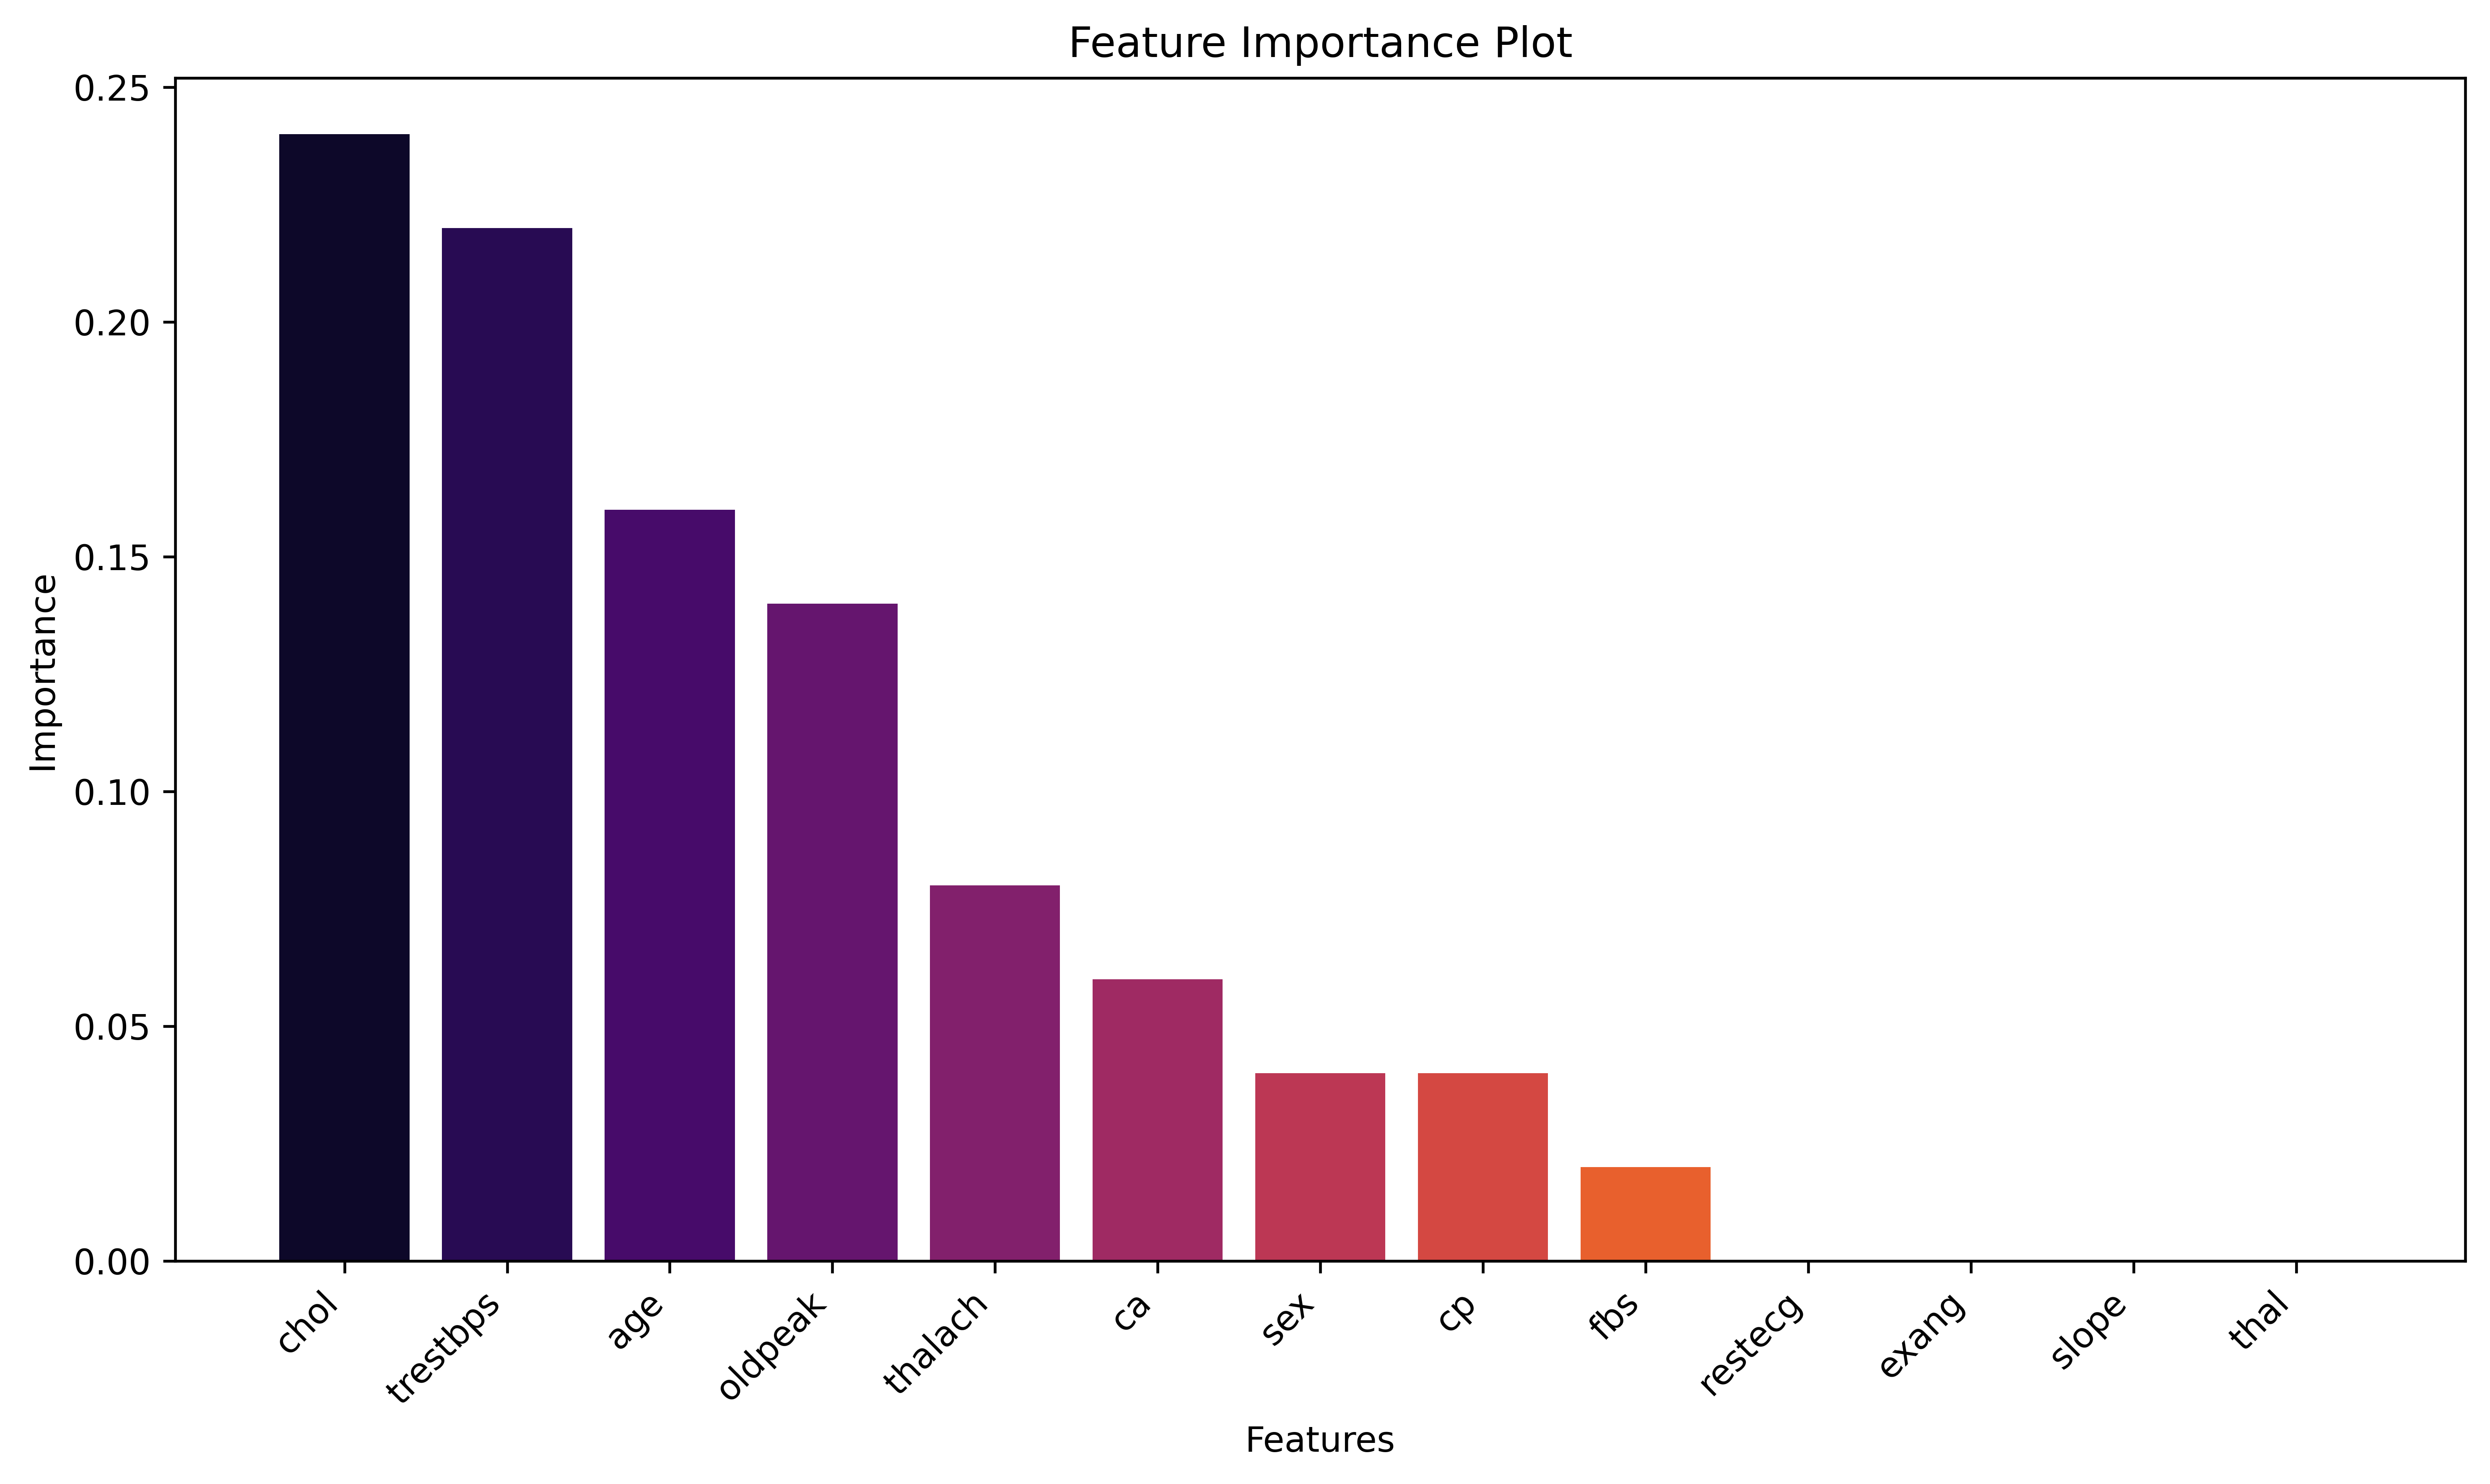

In [233]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier

importances = OvR_clf.estimators_[0].feature_importances_

# Create feature names as column indices (0, 1, 2, ...)
num_features = x.shape[1]
feature_names = [str(i) for i in range(num_features)]
attribute_names = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",'slope','ca','thal'
]
# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': attribute_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the importance_df DataFrame with 'Feature' and 'Importance' columns

# Sort the DataFrame by 'Importance' in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6), dpi=600)
plt.bar(importance_df['Feature'], importance_df['Importance'], color=sns.color_palette("inferno", len(importance_df)))


plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





array([0.09773178, 0.054924  , 0.08660001, 0.10438793, 0.12154523,
       0.01367751, 0.04859556, 0.12154535, 0.03314496, 0.13106987,
       0.04152829, 0.08073695, 0.06451256])

In [140]:
geometric_mean_score(Test_y,y_pred)

0.3025262618109274

In [141]:
sum(roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values())/len(roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values())








0.5875589919816397

In [1033]:
# Load the workbook
workbook = openpyxl.load_workbook('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Results.xlsx')

# Select a worksheet
worksheet = workbook['Proposed-ADABOOST.NC']
name = 'arrhythmia'
# Add new data to a specific row
row_num = 38  # example row number
c=row_num
base_estimator = DecisionTreeClassifier(max_depth=1)
OvR_clf = OneVsRestClassifier(AdaBoostClassifier(base_estimator=base_estimator,
                                 algorithm='SAMME.R', 
                                 n_estimators=100))
OvR_clf.fit(x, y)
y_pred = OvR_clf.predict(Test_x)
a = pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))
worksheet.cell(row=row_num, column=1).value = name
worksheet.cell(row=row_num, column=2).value = 'Proposed-ADABOOST.NC'
worksheet.cell(row=row_num, column=3).value = 'OneVsAll'
worksheet.cell(row=row_num, column=4).value = a.iloc[2,-1]
worksheet.cell(row=row_num, column=5).value = a.iloc[2,-2]
worksheet.cell(row=row_num, column=6).value = a.iloc[2,-3]
worksheet.cell(row=row_num, column=7).value = geometric_mean_score(Test_y,y_pred)
worksheet.cell(row=row_num, column=8).value = cohen_kappa_score(Test_y, y_pred, weights='quadratic')
worksheet.cell(row=row_num, column=9).value = a.iloc[1,-2]
worksheet.cell(row=row_num, column=10).value = a.iloc[0,-2]
worksheet.cell(row=row_num, column=11).value = hamming_loss(Test_y,y_pred)
r = roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values()
worksheet.cell(row=row_num, column=12).value = sum(r)/len(r)

# Add new data to a specific row
row_num = row_num+1  # example row number
Ovo_clf = OneVsOneClassifier(AdaBoostClassifier(base_estimator=base_estimator,
                                 algorithm='SAMME.R', 
                                 n_estimators=100))
Ovo_clf.fit(x, y)
y_pred = Ovo_clf.predict(Test_x)
b = pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))
worksheet.cell(row=row_num, column=1).value = name
worksheet.cell(row=row_num, column=2).value = 'Proposed-ADABOOST.NC'
worksheet.cell(row=row_num, column=3).value = 'OneVsOne'
worksheet.cell(row=row_num, column=4).value = b.iloc[2,-1]
worksheet.cell(row=row_num, column=5).value = b.iloc[2,-2]
worksheet.cell(row=row_num, column=6).value = b.iloc[2,-3]
worksheet.cell(row=row_num, column=7).value = geometric_mean_score(Test_y,y_pred)
worksheet.cell(row=row_num, column=8).value = cohen_kappa_score(Test_y, y_pred, weights='quadratic')
worksheet.cell(row=row_num, column=9).value = b.iloc[1,-2]
worksheet.cell(row=row_num, column=10).value = b.iloc[0,-2]
worksheet.cell(row=row_num, column=11).value = hamming_loss(Test_y,y_pred)
r = roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values()
worksheet.cell(row=row_num, column=12).value = sum(r)/len(r)

# Save the updated workbook
workbook.save('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Results.xlsx')


In [508]:
# Load the workbook
workbook = openpyxl.load_workbook('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Results.xlsx')

# Select a worksheet
worksheet = workbook['Proposed-ADABOOST']
name = 'zoo'
# Add new data to a specific row
row_num = 66  # example row number
c=row_num
OvR_clf = OneVsRestClassifier(AdaBoostClassifier())
OvR_clf.fit(x, y)
y_pred = OvR_clf.predict(Test_x)
a = pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))
worksheet.cell(row=row_num, column=1).value = name
worksheet.cell(row=row_num, column=2).value = 'Proposed-ADABOOST'
worksheet.cell(row=row_num, column=3).value = 'OneVsAll'
worksheet.cell(row=row_num, column=4).value = a.iloc[2,-1]
worksheet.cell(row=row_num, column=5).value = a.iloc[2,-2]
worksheet.cell(row=row_num, column=6).value = a.iloc[2,-3]
worksheet.cell(row=row_num, column=7).value = geometric_mean_score(Test_y,y_pred)
worksheet.cell(row=row_num, column=8).value = cohen_kappa_score(Test_y, y_pred, weights='quadratic')
worksheet.cell(row=row_num, column=9).value = a.iloc[1,-2]
worksheet.cell(row=row_num, column=10).value = a.iloc[0,-2]
worksheet.cell(row=row_num, column=11).value = hamming_loss(Test_y,y_pred)
r = roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values()
worksheet.cell(row=row_num, column=12).value = sum(r)/len(r)

# Add new data to a specific row
row_num = row_num+1  # example row number
Ovo_clf = OneVsOneClassifier(AdaBoostClassifier())
Ovo_clf.fit(x, y)
y_pred = Ovo_clf.predict(Test_x)
b = pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))
worksheet.cell(row=row_num, column=1).value = name
worksheet.cell(row=row_num, column=2).value = 'Proposed-ADABOOST'
worksheet.cell(row=row_num, column=3).value = 'OneVsOne'
worksheet.cell(row=row_num, column=4).value = b.iloc[2,-1]
worksheet.cell(row=row_num, column=5).value = b.iloc[2,-2]
worksheet.cell(row=row_num, column=6).value = b.iloc[2,-3]
worksheet.cell(row=row_num, column=7).value = geometric_mean_score(Test_y,y_pred)
worksheet.cell(row=row_num, column=8).value = cohen_kappa_score(Test_y, y_pred, weights='quadratic')
worksheet.cell(row=row_num, column=9).value = b.iloc[1,-2]
worksheet.cell(row=row_num, column=10).value = b.iloc[0,-2]
worksheet.cell(row=row_num, column=11).value = hamming_loss(Test_y,y_pred)
r = roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values()
worksheet.cell(row=row_num, column=12).value = sum(r)/len(r)

# Save the updated workbook
workbook.save('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Results.xlsx')


In [541]:
# Load the workbook
workbook = openpyxl.load_workbook('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Results.xlsx')

# Select a worksheet
worksheet = workbook['Proposed-RF']

# Add new data to a specific row
row_num = row_num-1  # example row number
c=row_num
OvR_clf = OneVsRestClassifier(RandomForestClassifier())
OvR_clf.fit(x, y)
y_pred = OvR_clf.predict(Test_x)
a = pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))
worksheet.cell(row=row_num, column=1).value = name
worksheet.cell(row=row_num, column=2).value = 'Proposed-RF'
worksheet.cell(row=row_num, column=3).value = 'OneVsAll'
worksheet.cell(row=row_num, column=4).value = a.iloc[2,-1]
worksheet.cell(row=row_num, column=5).value = a.iloc[2,-2]
worksheet.cell(row=row_num, column=6).value = a.iloc[2,-3]
worksheet.cell(row=row_num, column=7).value = geometric_mean_score(Test_y,y_pred)
worksheet.cell(row=row_num, column=8).value = cohen_kappa_score(Test_y, y_pred, weights='quadratic')
worksheet.cell(row=row_num, column=9).value = a.iloc[1,-2]
worksheet.cell(row=row_num, column=10).value = a.iloc[0,-2]
worksheet.cell(row=row_num, column=11).value = hamming_loss(Test_y,y_pred)
r = roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values()
worksheet.cell(row=row_num, column=12).value = sum(r)/len(r)

# Add new data to a specific row
row_num = row_num+1  # example row number
Ovo_clf = OneVsOneClassifier(RandomForestClassifier())
Ovo_clf.fit(x, y)
y_pred = Ovo_clf.predict(Test_x)
b = pd.DataFrame(classification_report(Test_y,y_pred,output_dict=True))
worksheet.cell(row=row_num, column=1).value = name
worksheet.cell(row=row_num, column=2).value = 'Proposed-RF'
worksheet.cell(row=row_num, column=3).value = 'OneVsOne'
worksheet.cell(row=row_num, column=4).value = b.iloc[2,-1]
worksheet.cell(row=row_num, column=5).value = b.iloc[2,-2]
worksheet.cell(row=row_num, column=6).value = b.iloc[2,-3]
worksheet.cell(row=row_num, column=7).value = geometric_mean_score(Test_y,y_pred)
worksheet.cell(row=row_num, column=8).value = cohen_kappa_score(Test_y, y_pred, weights='quadratic')
worksheet.cell(row=row_num, column=9).value = b.iloc[1,-2]
worksheet.cell(row=row_num, column=10).value = b.iloc[0,-2]
worksheet.cell(row=row_num, column=11).value = hamming_loss(Test_y,y_pred)
r = roc_auc_score_multiclass(Test_y, y_pred, average = "macro").values()
worksheet.cell(row=row_num, column=12).value = sum(r)/len(r)

# Save the updated workbook
workbook.save('C:/Users/ParsArgham/Desktop/Univercity/Papers/مقاله سوم ( متعادل سازی چندکلاسه)/Results.xlsx')


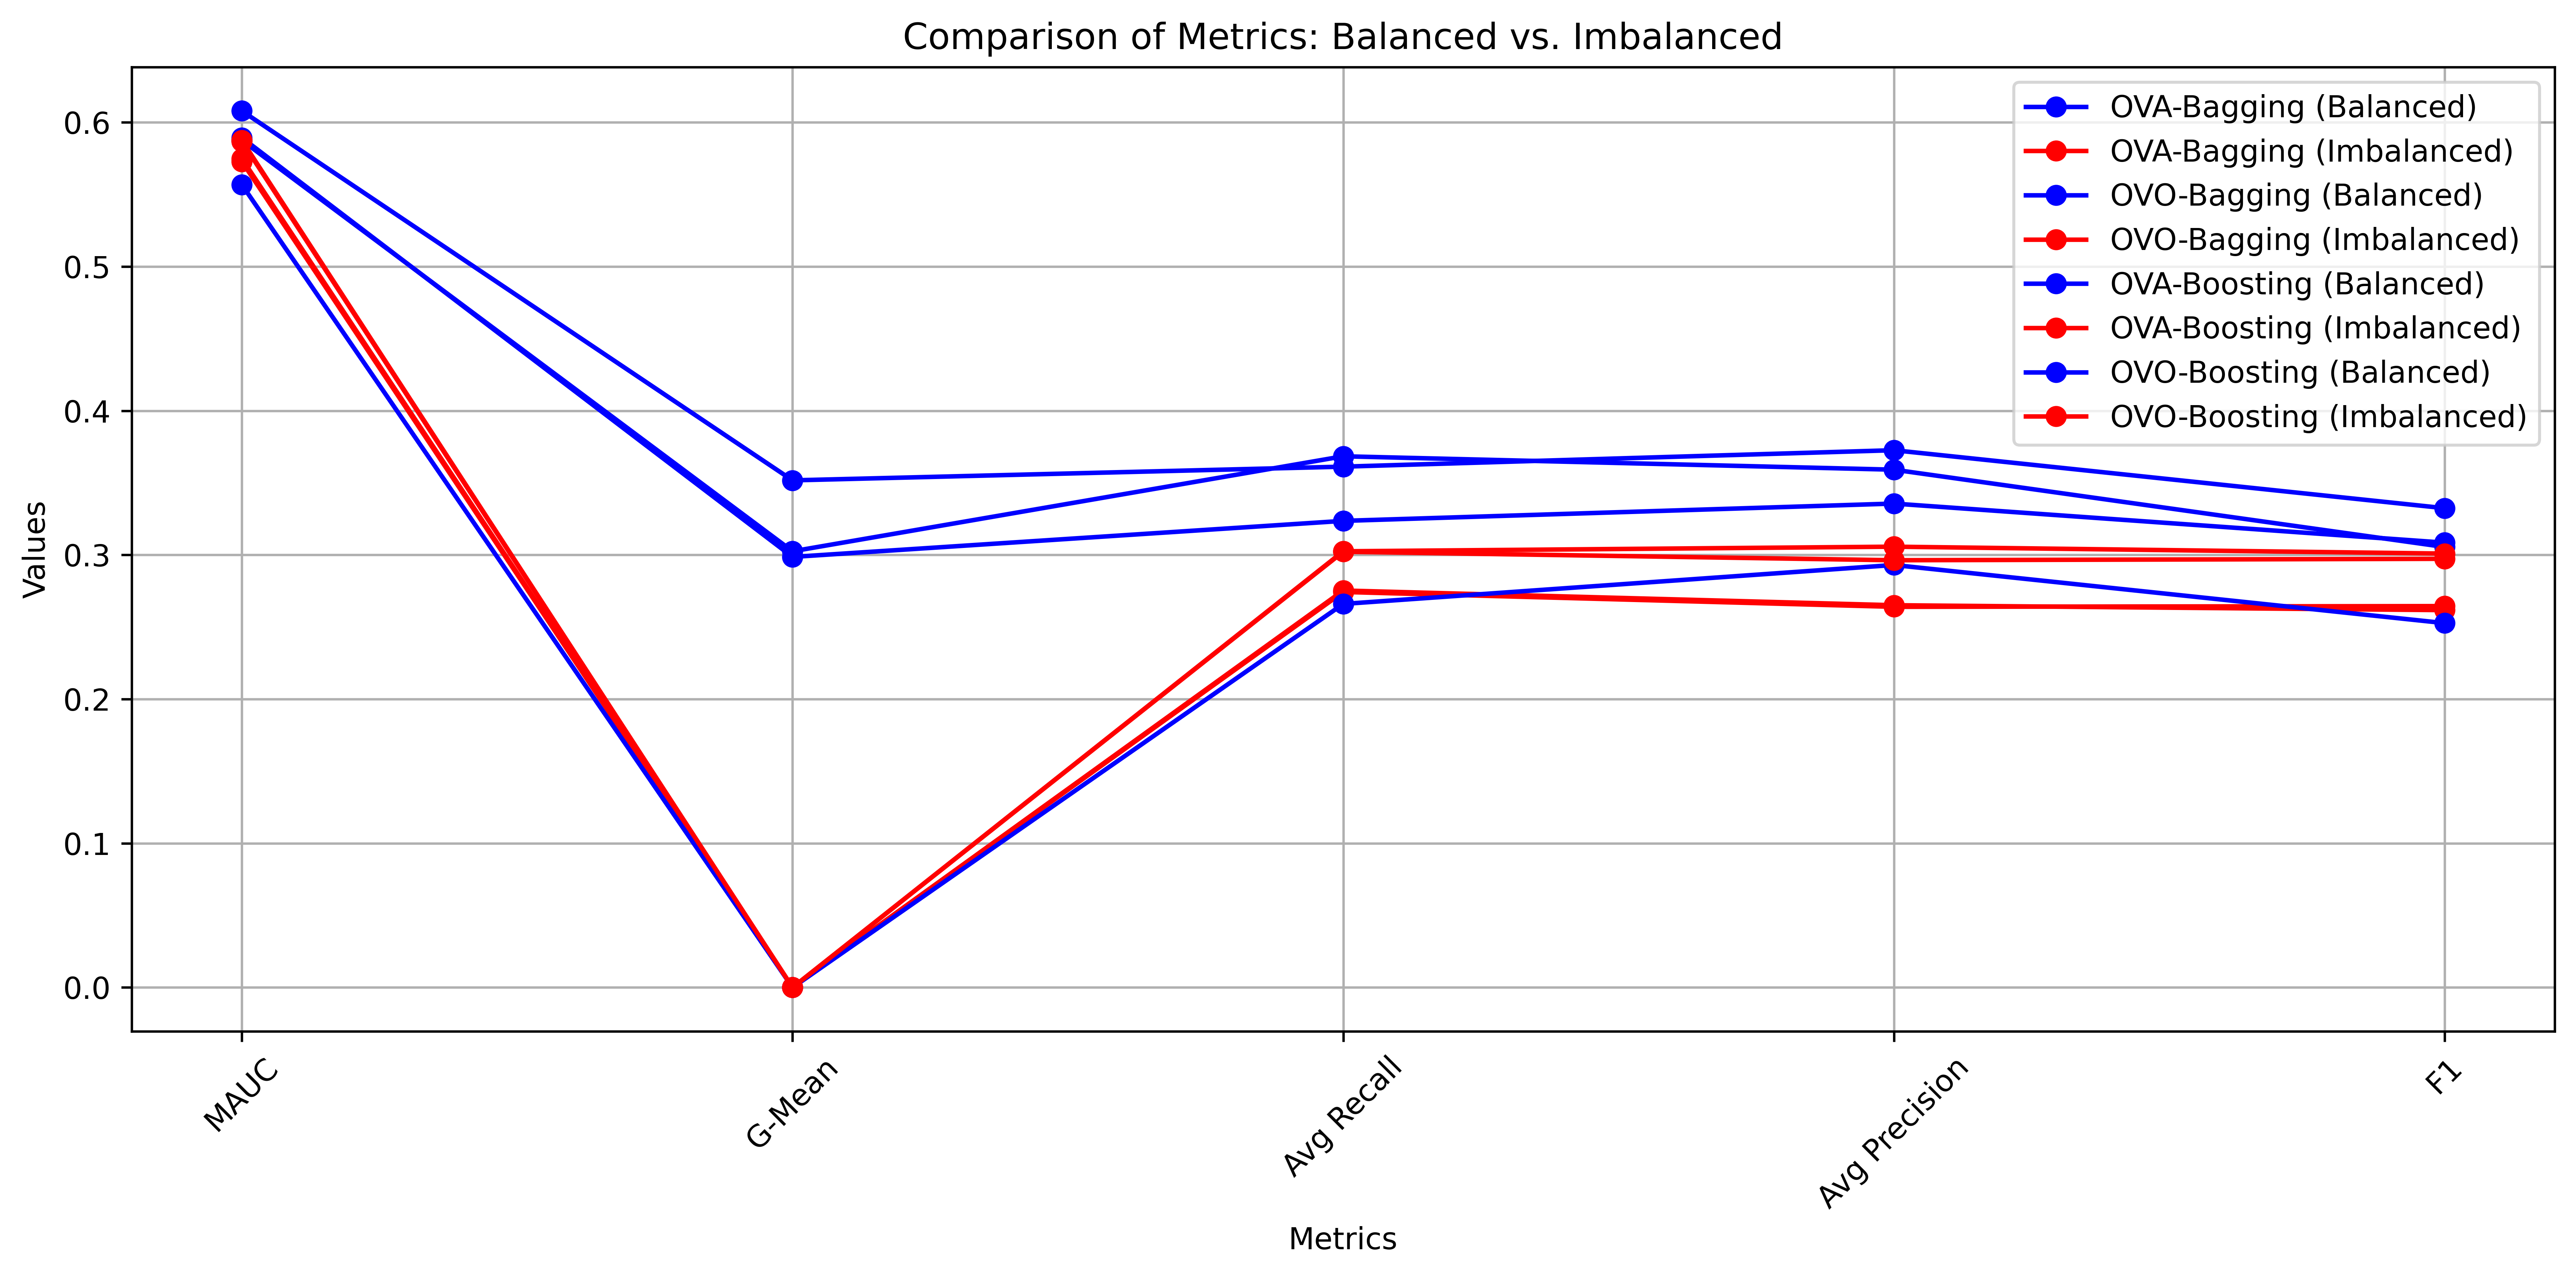

In [154]:
import matplotlib.pyplot as plt

# Data for the methods and metrics
methods = ['OVA-Bagging', 'OVO-Bagging', 'OVA-Boosting', 'OVO-Boosting']
metrics = ['MAUC', 'G-Mean', 'Avg Recall', 'Avg Precision', 'F1']
data = np.array([
    [0.5893, 0.2986, 0.3236, 0.3356, 0.3085],
    [0.5875, 0.3025, 0.3684, 0.3591, 0.3055],
    [0.5567, 0, 0.2660, 0.2930, 0.2527],
    [0.6079, 0.3517, 0.3612, 0.3726, 0.3324],
    [0.5748, 0, 0.2743, 0.2640, 0.2645],
    [0.5728, 0, 0.2753, 0.2651, 0.2617],
    [0.5867, 0, 0.3022, 0.2963, 0.2973],
    [0.5875, 0, 0.3025, 0.3057, 0.3009]
])
balancing_methods = ['Balanced', 'Imbalanced']

# Extract data for the two balancing methods
balanced_data = data[:4, :]
imbalanced_data = data[4:, :]

# Plotting the line plot for each algorithm
plt.figure(figsize=(12, 6),dpi=600)

for i, method in enumerate(methods):
    plt.plot(metrics, balanced_data[i, :], marker='o', label=f'{method} (Balanced)', color='b')
    plt.plot(metrics, imbalanced_data[i, :], marker='o', label=f'{method} (Imbalanced)', color='r')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics: Balanced vs. Imbalanced')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()
